# Problem Statemant

Banyaknya data medis yang tersedia diluaran sana dan munculnya ilmu data science, membuat banyak startup mengambil tantangan untuk mencoba menciptakan indikator penyakit yang mungkin akan terjadi di masa depan. penyakit kardiovaskuler(CVD) adalah penyebab kematian global, diperkirakan sampai 17.9 juta orang meninggal pertahunnya disebakan oleh jantung (https://hellosehat.com/jantung/penyakit-jantung-di-indonesia/), yang mencakup sampai 32% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD. Orang yang menderita penyakit kardiovaskular atau yang berisiko tinggi terkena penyakit kardiovaskular (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dini dan pengelolaan di mana model machine learning dapat sangat membantu mengatasi masalah lain yang terjadi dalam alam dengan tujuan untuk mengatasi masalah tersebut dan fokus pada masalah berikutnya dengan bantuan teknik kecerdasan buatan (AI).

Target :
- Untuk mengklasifikasikan/memprediksi apakah seorang pasien berisiko mengalami gagal jantung berdasarkan beberapa atribut.
- Ini adalah klasifikasi biner dengan berbagai fitur numerik dan kategorikal.

<div style="text-align:center">Dataset Attributes</div>

1. Usia (Age) : Usia pasien [tahun].
2. Jenis Kelamin (Sex) : Jenis kelamin pasien [L: Laki-laki, P: Perempuan].
3. Jenis Nyeri Dada (ChestPainType): Jenis nyeri dada yang dirasakan [TA: Angina Tipe Tipikal, ATA: Angina Tipe Atipikal, NAP: Nyeri Tidak Terkait Angina, ASY: Asimtomatik].
4. Tekanan Darah Saat Istirahat (RestingBP) : Tekanan darah saat pasien dalam keadaan istirahat [mm Hg].
5. Kolesterol Serum (Cholesterol) : Kolesterol serum dalam darah [mm/dl].
6. Gula Darah Saat Puasa (FastingBS) : Gula darah saat puasa [1: jika Gula Darah Saat Puasa > 120 mg/dl, 0: sebaliknya].
7. Hasil Elektrokardiogram Saat Istirahat (RestingECG) : Hasil elektrokardiogram saat pasien dalam keadaan istirahat [Normal: Normal, ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0.05 mV), LVH: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti berdasarkan kriteria Estes].
8. Detak Jantung Maksimum yang Dicapai (MaxHR) : Detak jantung maksimum yang dapat dicapai oleh pasien [Nilai numerik antara 60 dan 202].
9. Angina yang Dipicu oleh Latihan (ExerciseAngina) : Angina yang dipicu oleh latihan [Y: Ya, N: Tidak].
10. Oldpeak : Oldpeak = ST [Nilai numerik yang diukur dalam depresi].
11. Kemiringan Segment ST Puncak Latihan Maksimum (ST_Slope) : Kemiringan segmen ST puncak latihan maksimum [Naik: Naik, Datar: Datar, Turun: Turun].
12. Penyakit Jantung (HeartDisease) : Kelas keluaran [1: penyakit jantung, 0: Normal].

## Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Modeling
- Conclusion

# <div style="text-align:center">Dataset Information</div>

In [1]:
# Import Necessary Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/heart_failure_prediction.csv')

In [60]:
data['Oldpeak'].value_counts()

0.00     305
1.00      63
2.00      54
1.50      38
3.00      23
1.20      22
0.20      19
1.80      15
1.40      15
0.60      14
0.80      12
2.50      11
1.60      11
0.50      11
0.10      10
0.40      10
0.30       9
2.60       6
2.80       6
1.90       6
1.70       5
1.30       5
1.10       4
2.20       4
3.60       4
0.90       3
2.40       3
3.40       2
3.50       2
2.30       2
3.20       2
3.10       1
0.70       1
2.10       1
2.90       1
-0.10      1
Name: Oldpeak, dtype: int64

In [4]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Data info :

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:>

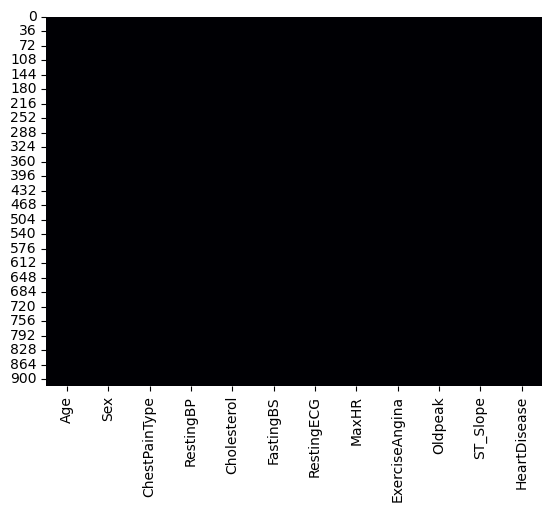

In [6]:
sns.heatmap(data.isnull(), cmap='magma', cbar=False)

no null values in dataset

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


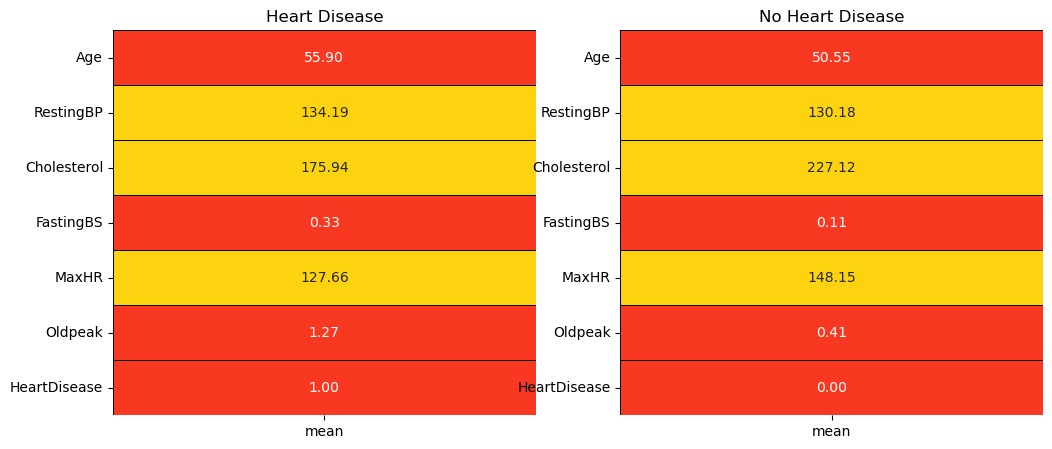

In [8]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data.loc[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors, linewidths = 0.4, linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');


plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors, linewidths = 0.4, linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('No Heart Disease');

# <div style="text-align:center">Exploratory Data Analysis</div>

- Mean values of all the features for cases of heart diseases and non-heart diseases.

In [9]:
col = list(data.columns)

categorical_features = []
numerical_features = []

for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    elif len(data[i].unique()) < 5:
        categorical_features.append(i)
        
print('Numerical Features : ', *numerical_features)
print('Categorical Features : ', *categorical_features)

Numerical Features :  Age RestingBP Cholesterol MaxHR Oldpeak
Categorical Features :  Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease


- Di sini, fitur kategorikal didefinisikan jika atribut memiliki kurang dari 6 elemen unik; jika tidak, itu adalah fitur numerik. 
- Pendekatan umum untuk membagi fitur seperti ini juga dapat didasarkan pada jenis data elemen-elemen atribut yang bersangkutan. 

Misalnya, jika jenis data adalah bilangan bulat, maka atribut tersebut dianggap sebagai fitur numerik; jika jenis data adalah string, maka atribut tersebut dianggap sebagai fitur kategorikal.

- Untuk dataset ini, karena jumlah fiturnya tidak banyak, kita juga dapat memeriksa dataset ini secara manual untuk menentukan apakah suatu atribut adalah fitur kategorikal atau fitur numerik.

Categorical Features

In [10]:
for i in data[categorical_features]:
    display(data[i].value_counts())

M    725
F    193
Name: Sex, dtype: int64

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

0    704
1    214
Name: FastingBS, dtype: int64

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [12]:
for i in data[categorical_features]:
    display(df1[i].value_counts())

1    725
0    193
Name: Sex, dtype: int64

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

0    704
1    214
Name: FastingBS, dtype: int64

1    552
0    188
2    178
Name: RestingECG, dtype: int64

0    547
1    371
Name: ExerciseAngina, dtype: int64

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64

In [13]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.20,1,1
914,68,1,0,144,193,1,1,141,0,3.40,1,1
915,57,1,0,130,131,0,1,115,1,1.20,1,1
916,57,0,1,130,236,0,0,174,0,0.00,1,1


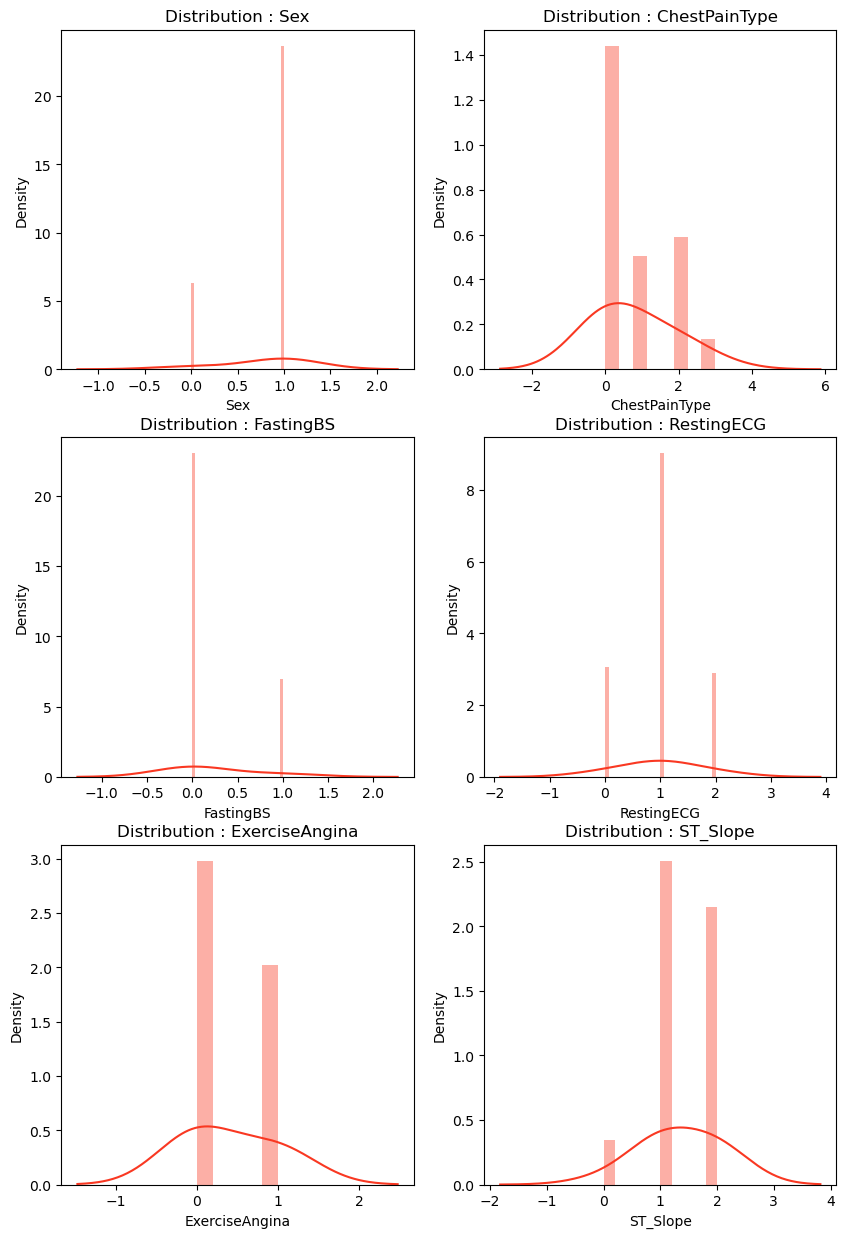

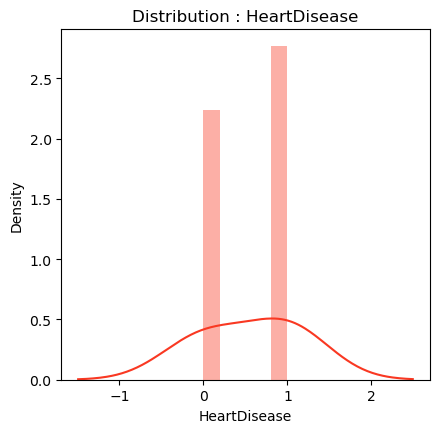

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- Semua fitur kategori mendekati normal distribusi

Numerical Features

Distribusi fitur numerik

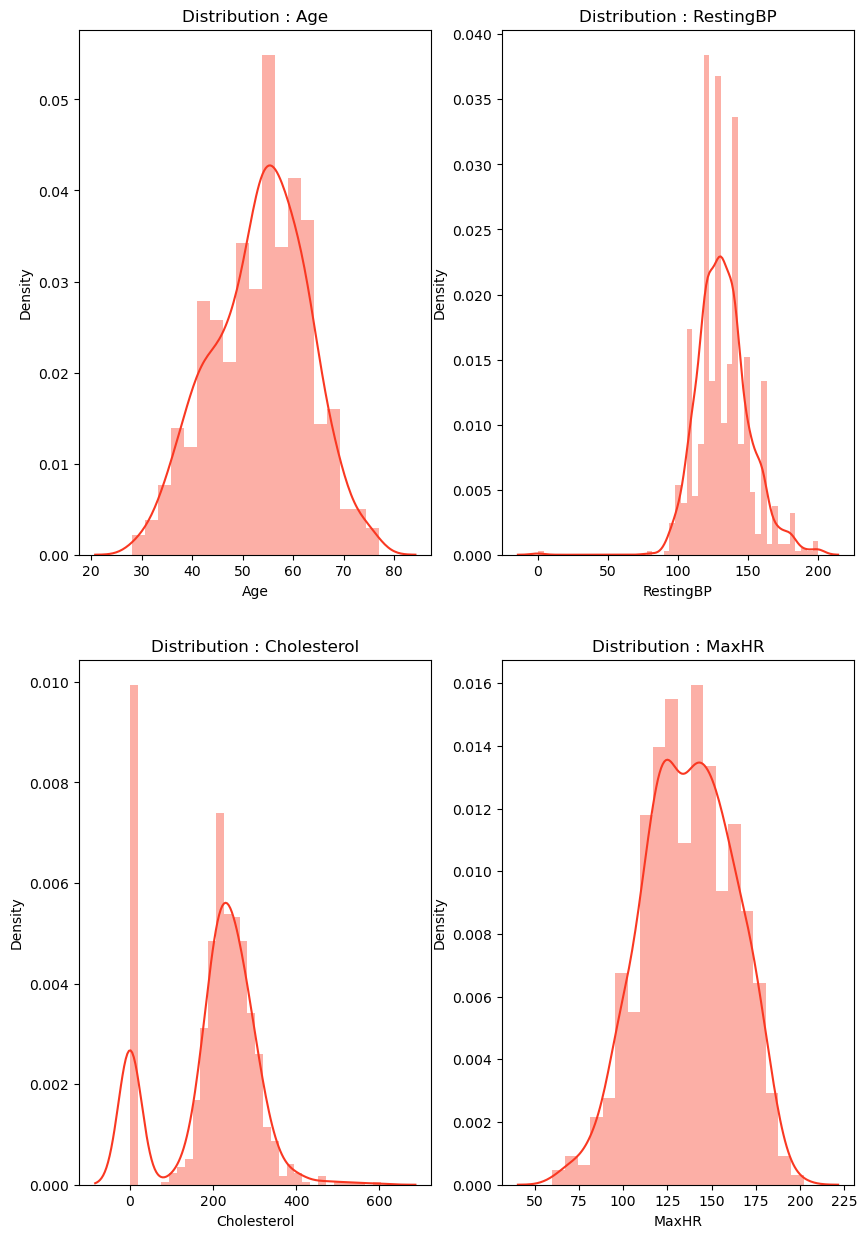

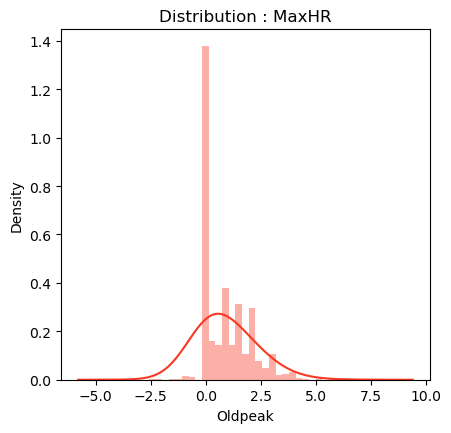

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(10,15))

for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[numerical_features[i]], color=colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1}, color=colors[0])
title = 'Distribution : ' + numerical_features[i]
plt.title(title)
plt.show()

Oldpeak's memiliki distribusi data yang right skewed 
-  jika data dari atribut "Oldpeak" dalam dataset Anda adalah "rightly skewed," itu berarti bahwa sebagian besar nilai "Oldpeak" cenderung rendah, sementara nilai-nilai yang tinggi lebih jarang terjadi. Ini bisa mengindikasikan bahwa mayoritas pasien cenderung memiliki tingkat "Oldpeak" yang rendah, sementara kasus dengan tingkat "Oldpeak" yang tinggi lebih jarang terjadi.

Cholestrol memiliki 2 puncak dalam distribusi datanya
- jika distribusi data kolesterol bimodal, itu mengindikasikan bahwa terdapat dua kelompok atau populasi data yang memiliki kolesterol yang cenderung berbeda satu sama lain. Artinya, ada dua nilai atau rentang nilai yang paling sering muncul dalam data kolesterol, dan distribusi data ini tidak mengikuti pola distribusi tunggal yang simetris seperti distribusi normal.Penting untuk memahami pola distribusi data, karena ini dapat memberikan wawasan tentang karakteristik populasi atau kelompok yang sedang diobservasi. Dalam kasus distribusi data kolesterol yang bimodal, ini dapat mengindikasikan adanya dua kelompok pasien atau populasi dengan tingkat kolesterol yang berbeda dalam sampel data.

In [16]:
data['Cholesterol'].value_counts().head()

0      172
254     11
223     10
220     10
230      9
Name: Cholesterol, dtype: int64

Target Variable Visualization(Heart Disease)

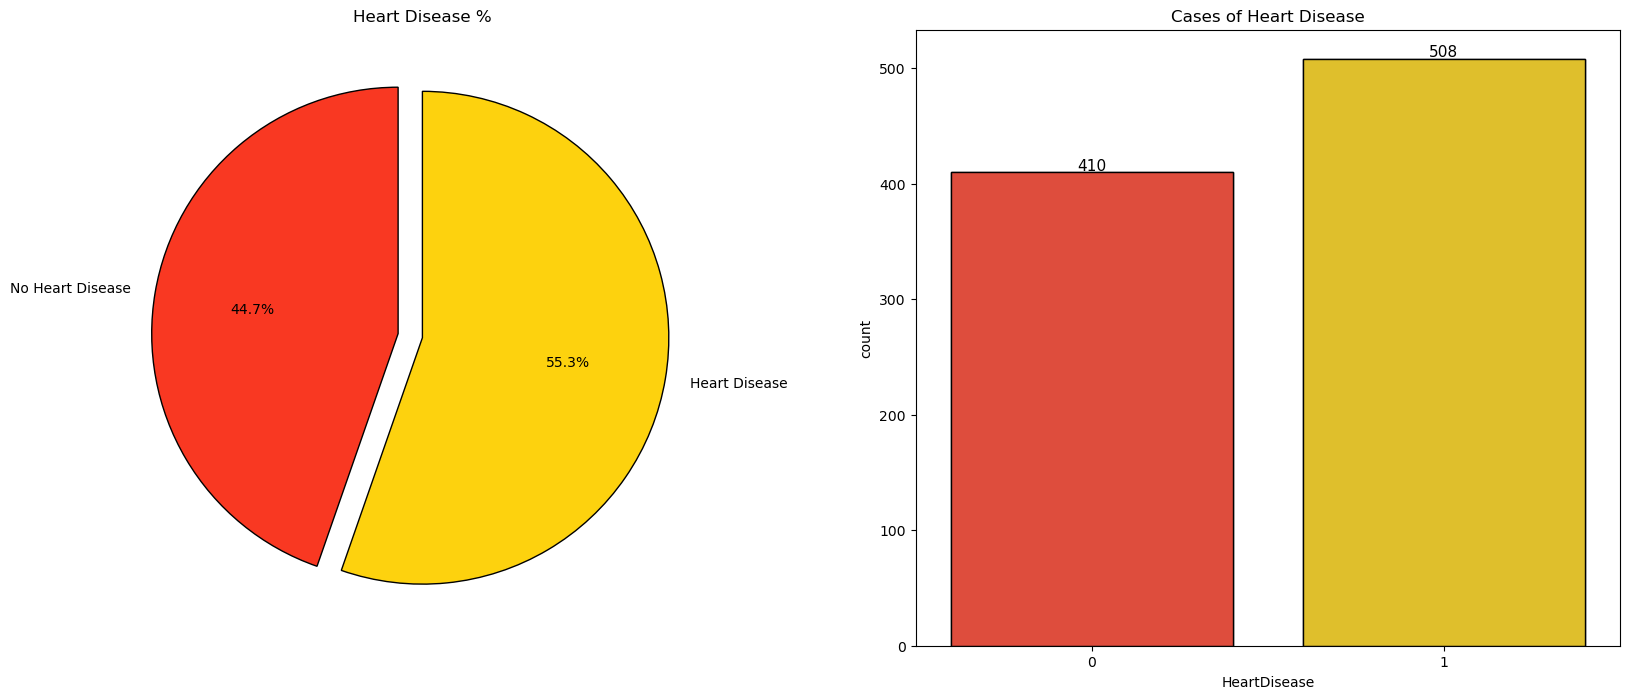

In [17]:
target1 = list(data['HeartDisease'].value_counts())
circle = [target1[1] / sum(target1) * 100, target1[0] / sum(target1) * 100] 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

plt.subplot(1,2,1)
plt.pie(circle, labels=['No Heart Disease','Heart Disease'], autopct='%1.1f%%', startangle=90, explode = (0.1,0), colors = colors,  wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %')

plt.subplot(1,2,2)
ax = sns.countplot('HeartDisease',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
sns.countplot('HeartDisease',data = data,palette = colors,edgecolor = 'black')
plt.title('Cases of Heart Disease');


plt.show()

- hasil dataset terlihat seimbang

Kategori Atribut VS Target Variable(Heart Disease)

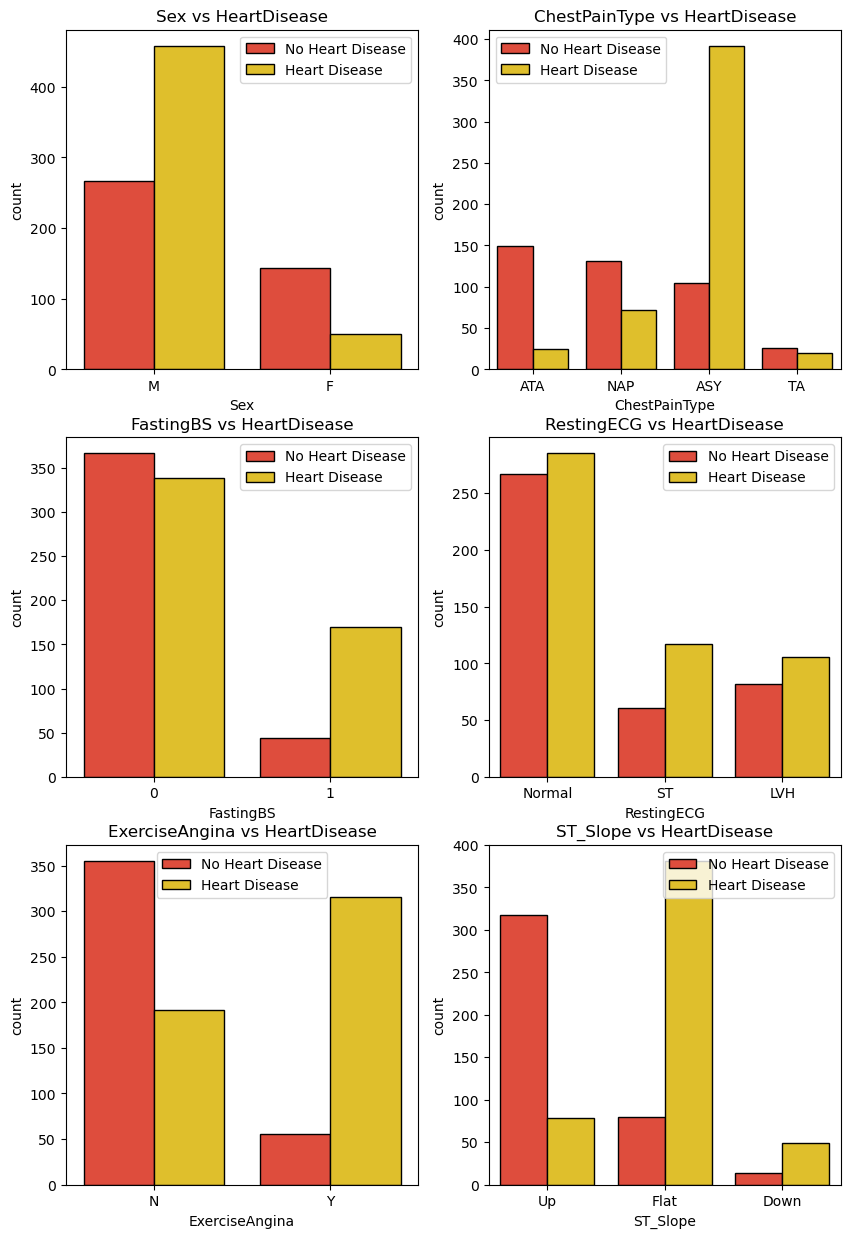

In [18]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(10,15))

for i in range(len(categorical_features) -1):
    plt.subplot(3,2,i+1)
    sns.countplot(categorical_features[i],data = data,hue = "HeartDisease",palette = colors,edgecolor = 'black')
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

- Penduduk laki-laki memiliki lebih banyak pasien penyakit jantung daripada yang tidak memiliki penyakit jantung. Namun, dalam kasus penduduk perempuan, pasien penyakit jantung lebih sedikit daripada yang tidak memiliki penyakit jantung.
- Jenis nyeri dada "ASY" secara signifikan  tidak ada gejala atau nyeri yang dirasakan. Dalam konteks nyeri dada, ini mengindikasikan bahwa pasien tidak mengalami nyeri atau gejala apapun yang terkait dengan dada atau masalah jantung.
- Fasting Blood Sugar (kadar gula darah saat puasa) adalah hal yang rumit! Pasien yang didiagnosis dengan Fasting Blood Sugar tinggi dan rendah memiliki jumlah pasien penyakit jantung yang signifikan.
- Hasil elektrokardiogram saat istirahat (RestingECG) tidak menunjukkan kategori yang jelas yang menyoroti pasien penyakit jantung. Ketiga nilai kategori dalam RestingECG memiliki jumlah pasien penyakit jantung yang tinggi.
- Angina yang dipicu oleh latihan fisik (Exercise Induced Engina) secara pasti meningkatkan probabilitas terdiagnosis dengan penyakit jantung.
- Dalam hal nilai ST_Slope, slope datar (flat slope) menunjukkan probabilitas tinggi terdiagnosis dengan penyakit jantung. Slope yang menurun (down) juga menunjukkan hasil yang sama, tetapi dalam jumlah data yang sedikit.

Categorical Features VS Positive Heart Disease

In [19]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

chestpain = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
chestpain = [chestpain[0] / sum(chestpain) * 100, chestpain[1] / sum(chestpain) * 100, chestpain[2] / sum(chestpain) * 100, chestpain[3] / sum(chestpain) * 100]

fastingbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fastingbs = [fastingbs[0] / sum(fastingbs) * 100,fastingbs[1] / sum(fastingbs) * 100]

restingECG = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restingECG = [restingECG[0] / sum(restingECG) * 100,restingECG[1] / sum(restingECG) * 100,restingECG[2] / sum(restingECG) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

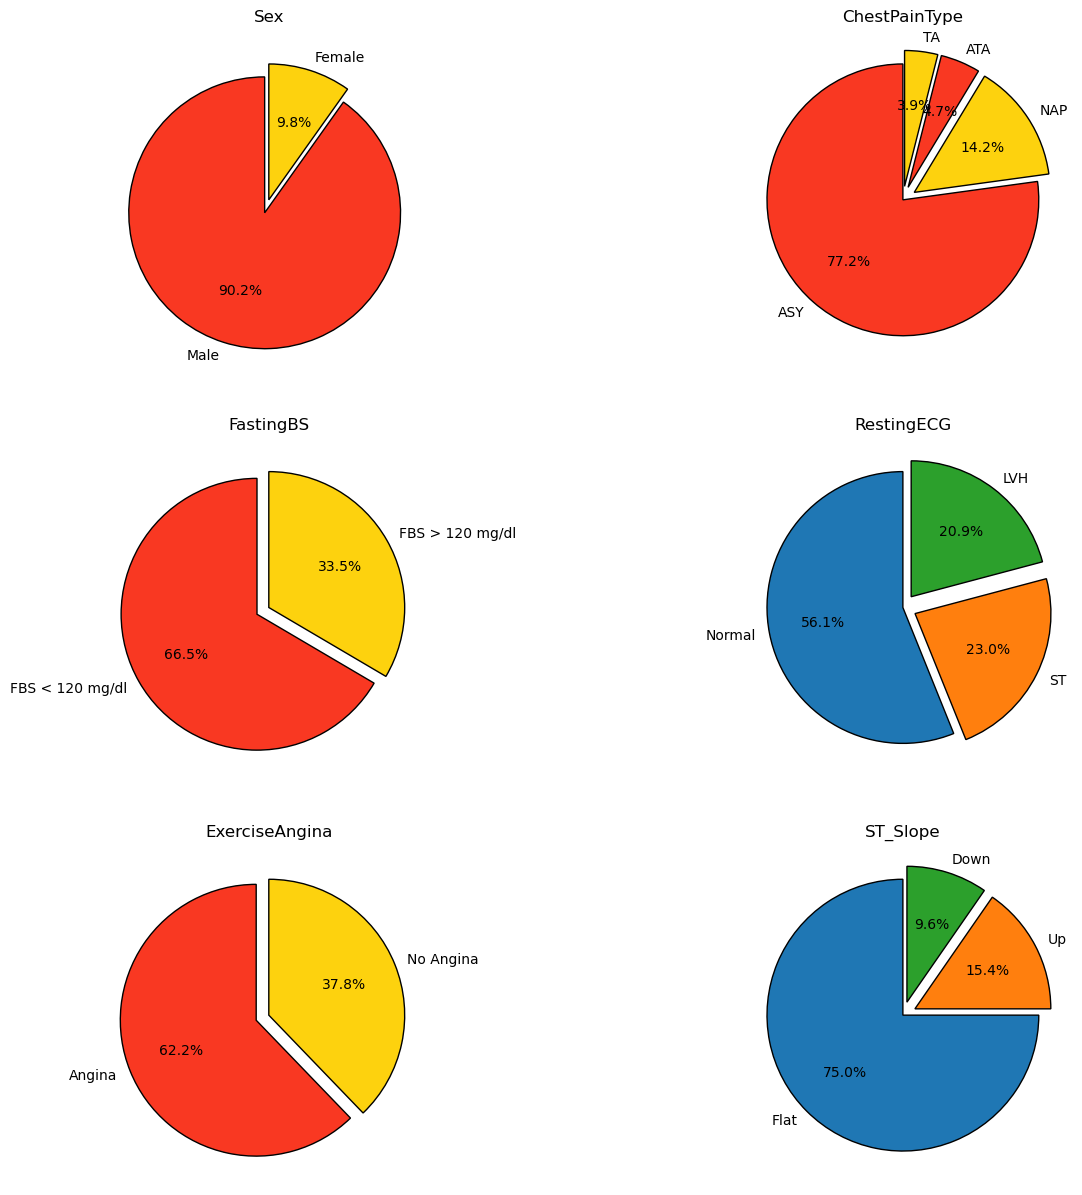

In [20]:
ax,fig = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex, labels=['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(chestpain, labels=['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fastingbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restingECG,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

- Dari seluruh pasien penyakit jantung, 90% di antaranya adalah laki-laki.

- Ketika kita berbicara tentang jenis nyeri dada, jenis ASY mendominasi dengan 77% yang mengarah pada penyakit jantung.

- Tingkat Fasting Blood Sugar < 120 mg/dL menunjukkan kemungkinan tinggi terkena penyakit jantung.

- Untuk hasil elektrokardiogram saat istirahat (RestingECG), level Normal memiliki peluang 56% lebih tinggi untuk terkena penyakit jantung dibandingkan dengan LVH dan level ST.

- Deteksi Angina yang Dipicu Latihan Fisik juga menunjukkan kemungkinan terkena penyakit jantung.

- Ketika berbicara tentang pembacaan ST_Slope, level Flat mendominasi dengan 75% yang mungkin membantu mendeteksi masalah jantung yang mendasari.

Numerik Variabel VS Kategori Variabel terkait dengan target HeartDisease

- Sex Vs Numerical Variable

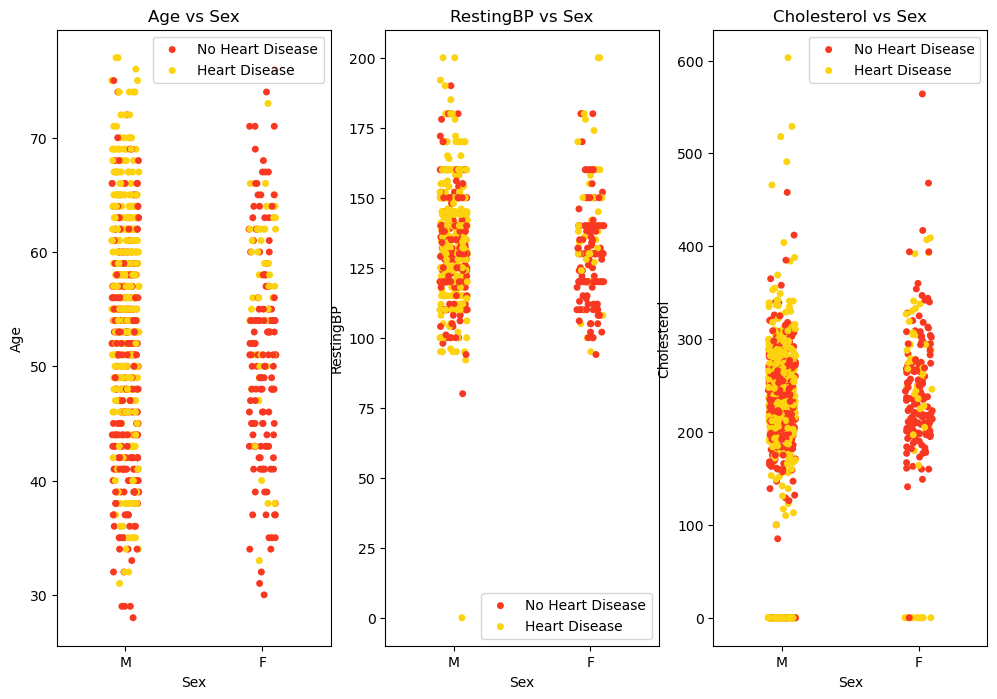

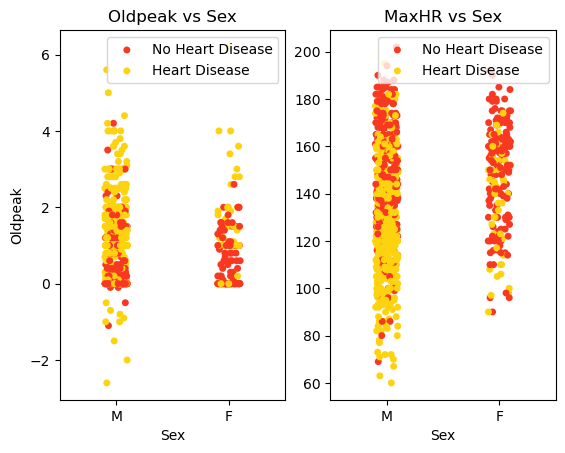

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

plt.show()

for i in [-2,-1]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

plt.show()

- Populasi pria cenderung memiliki penyakit jantung pada hampir semua nilai fitur numerik. Di atas usia 50 tahun, dengan nilai old peak yang positif dan denyut jantung maksimum di bawah 140, kasus penyakit jantung pada populasi pria menjadi lebih tinggi.

- Data populasi wanita memiliki jumlah data yang sangat sedikit dibandingkan dengan populasi pria. Oleh karena itu, kita tidak dapat menunjukkan rentang atau nilai spesifik yang menunjukkan kasus penyakit jantung pada populasi wanita.

- Chest Pain Vs Numerical Variable

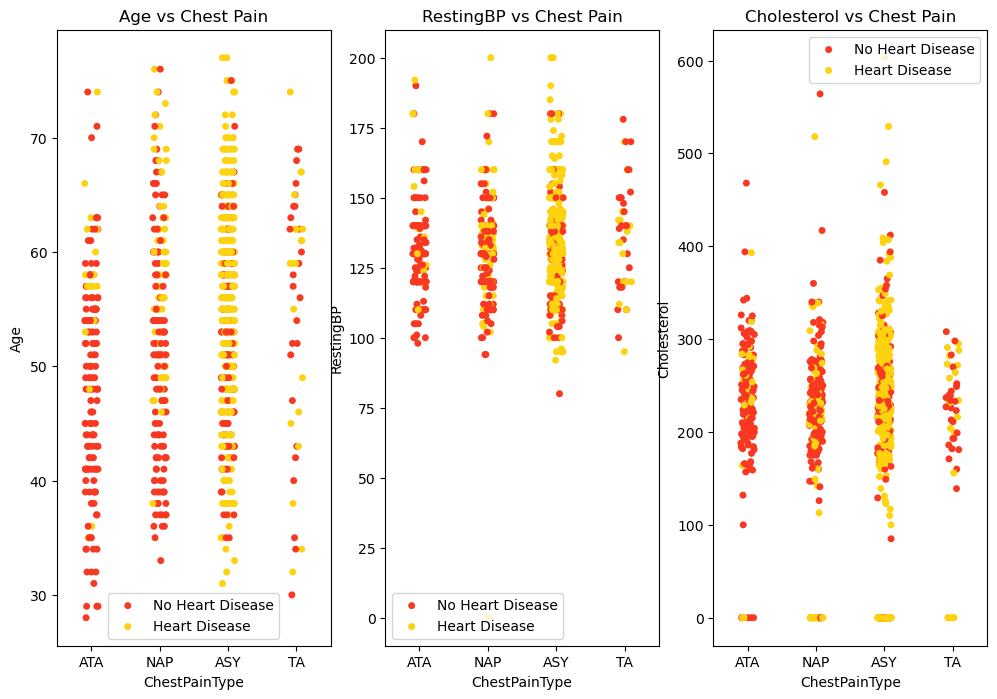

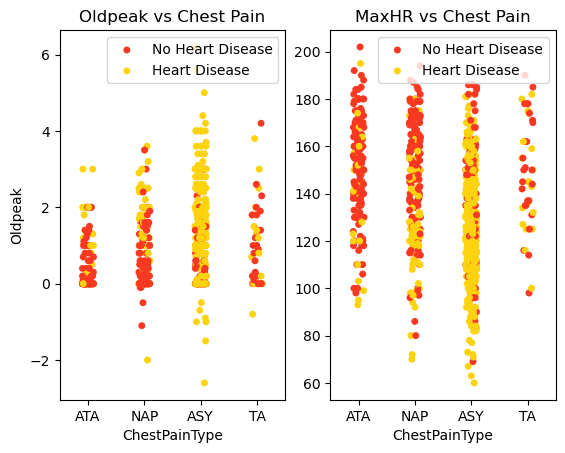

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Chest Pain' 
    plt.title(title);

plt.show()

for i in [-2,-1]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Chest Pain' 
    plt.title(title);

plt.show()

- Jenis nyeri dada "ASY" mendominasi jenis nyeri dada lainnya pada semua fitur numerik dengan perbedaan yang signifikan.

- Fasting Blood Sugar Vs Numerical Variable

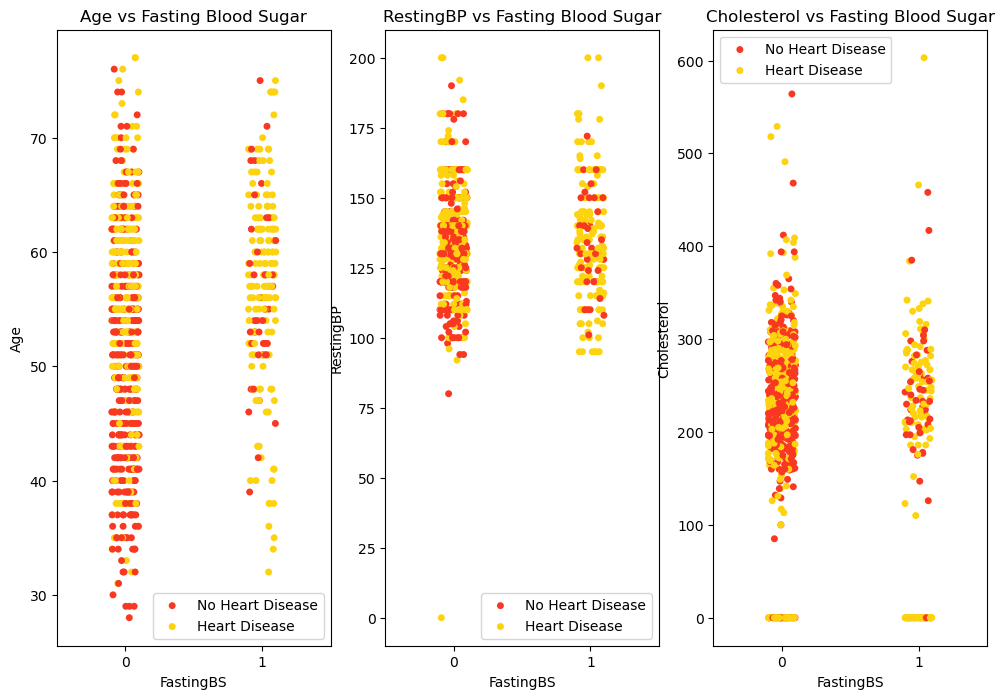

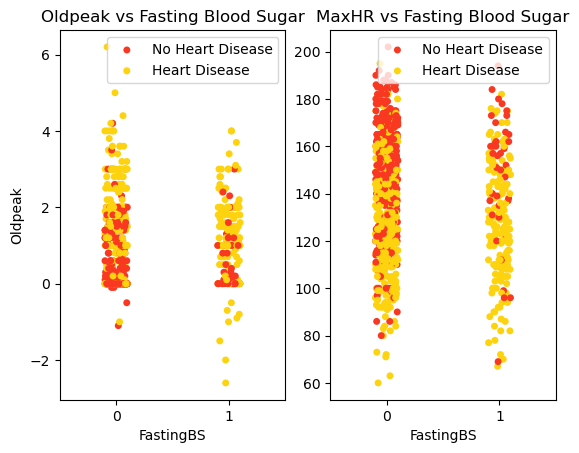

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

plt.show()

for i in [-2,-1]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

plt.show()

- Di atas usia 50 tahun, penyakit jantung ditemukan di seluruh data tanpa memandang apakah pasien tersebut didiagnosis dengan Kadar Gula Darah Puasa atau tidak.
- Kadar Gula Darah Puasa dengan Tekanan Darah Istirahat di atas 100 telah menunjukkan lebih banyak kasus penyakit jantung daripada pasien tanpa kadar gula darah puasa.
- Kolesterol dengan Kadar Gula Darah Puasa tidak tampaknya memiliki pengaruh dalam memahami alasan di balik penyakit jantung.

- Resting ECG Vs Numerical Variable

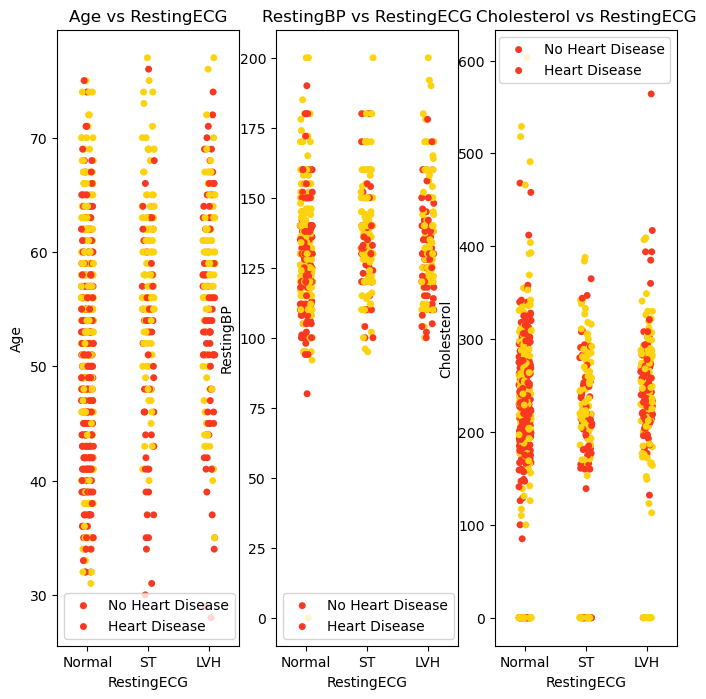

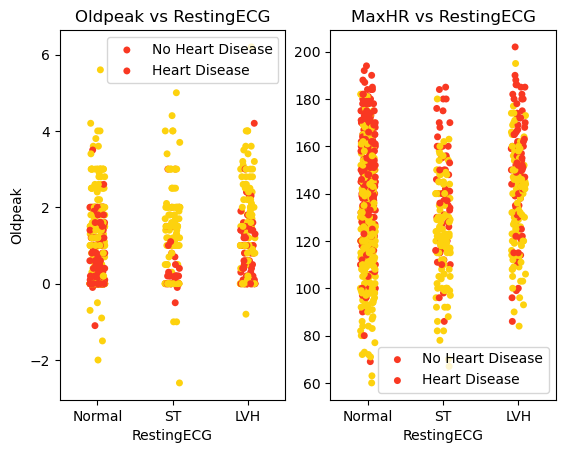

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,8))

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

plt.show()

for i in [-2,-1]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=data, hue='HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

plt.show()

- Penyakit jantung dengan nilai RestingECG Normal, ST, dan LVH terdeteksi mulai dari usia 30, 40, dan 40 tahun secara berturut-turut. Pasien di atas usia 50 tahun lebih rentan daripada usia lainnya, tanpa memandang nilai RestingECG.

- Penyakit jantung ditemukan secara konsisten pada nilai RestingBP dan RestingECG apa pun.

- Nilai kolesterol antara 200 hingga 300 yang dikaitkan dengan nilai ST dari RestingECG menunjukkan sekelompok pasien yang menderita penyakit jantung.

- Untuk nilai Denyut Jantung Maksimum, penyakit jantung terdeteksi dengan signifikan di bawah 140 poin dan RestingECG Normal. Nilai ST dan LVH sepanjang nilai denyut jantung maksimum menampilkan kasus penyakit jantung.

- ExerciseAngina vs Numerical Features :

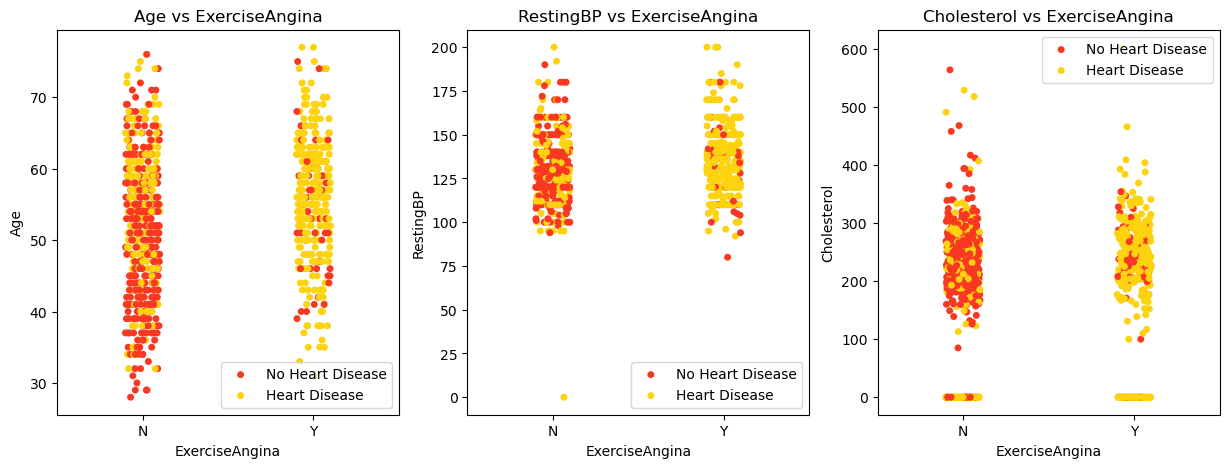

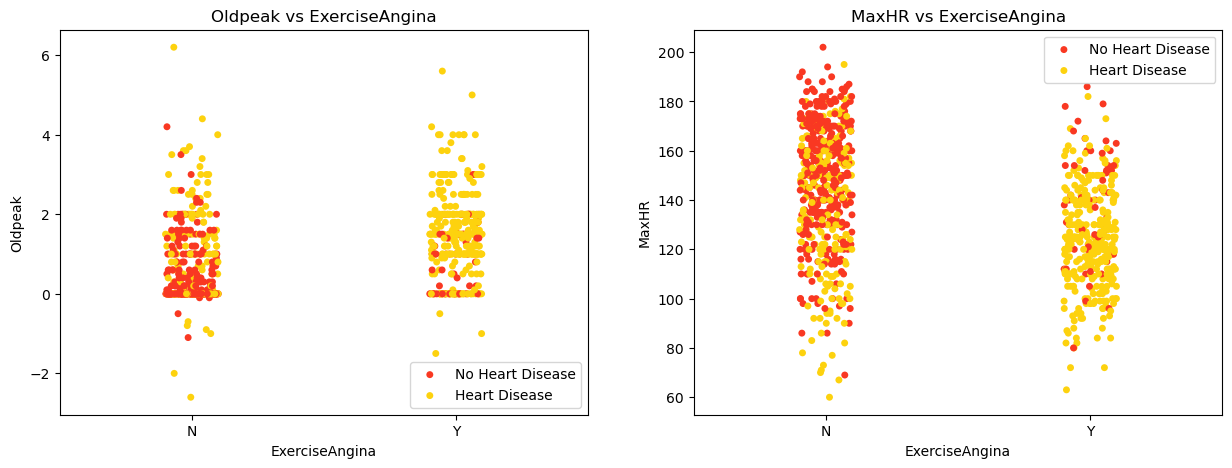

In [25]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

plt.show()    

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);
    
plt.show()

- Dapat dibuat pengamatan yang sangat jelas tentang hubungan antara kasus penyakit jantung dan Angina yang Diinduksi oleh Latihan. Korelasi positif antara kedua fitur tersebut dapat disimpulkan pada semua fitur numerik.

- St_Slope vs Numerical Features

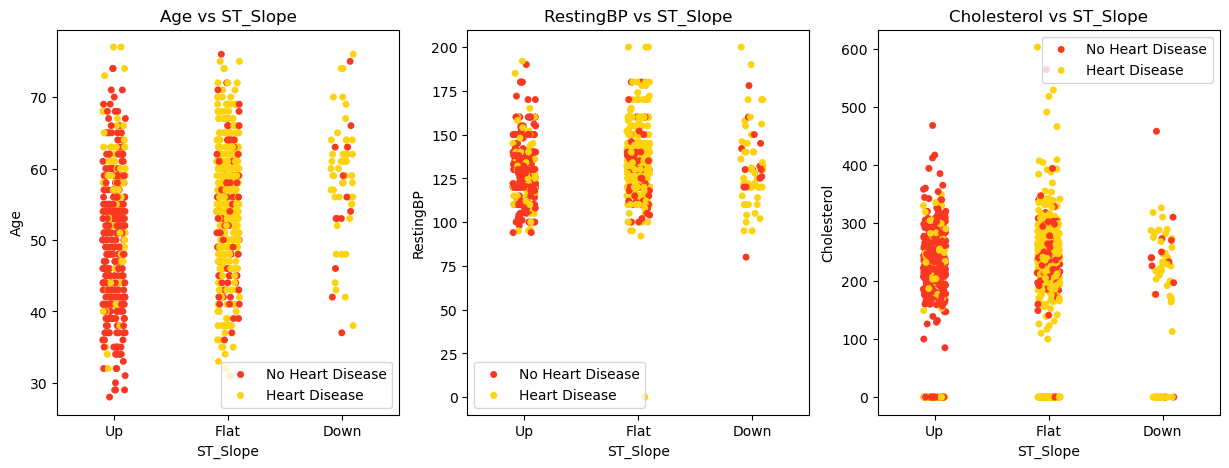

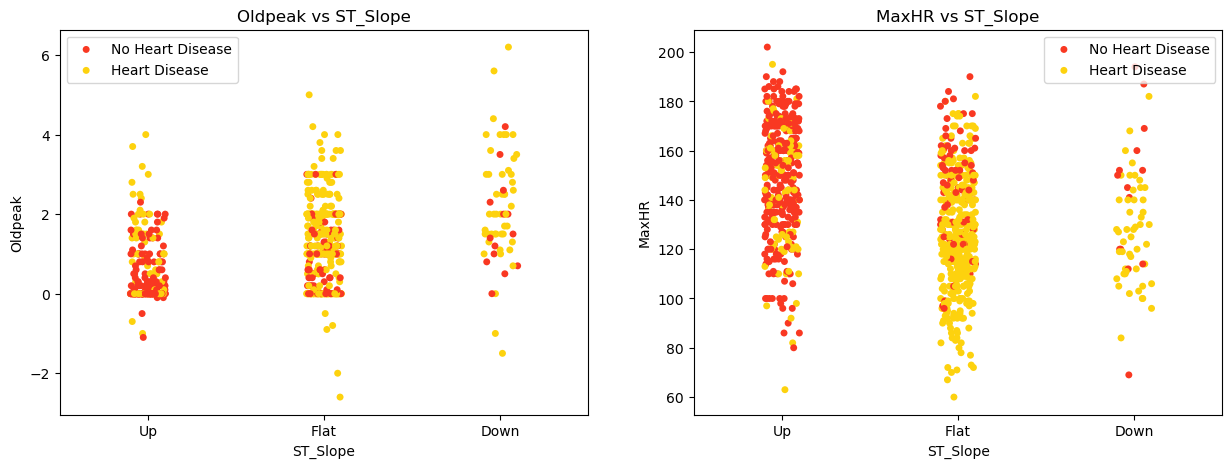

In [26]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

Dapat dibuat pengamatan yang sangat jelas tentang korelasi positif antara nilai ST_Slope dan kasus Penyakit Jantung.
"Flat" (datar), "Down" (turun), dan "Up" (naik) secara berurutan menunjukkan probabilitas tinggi, menengah, dan rendah untuk didiagnosis dengan penyakit jantung.

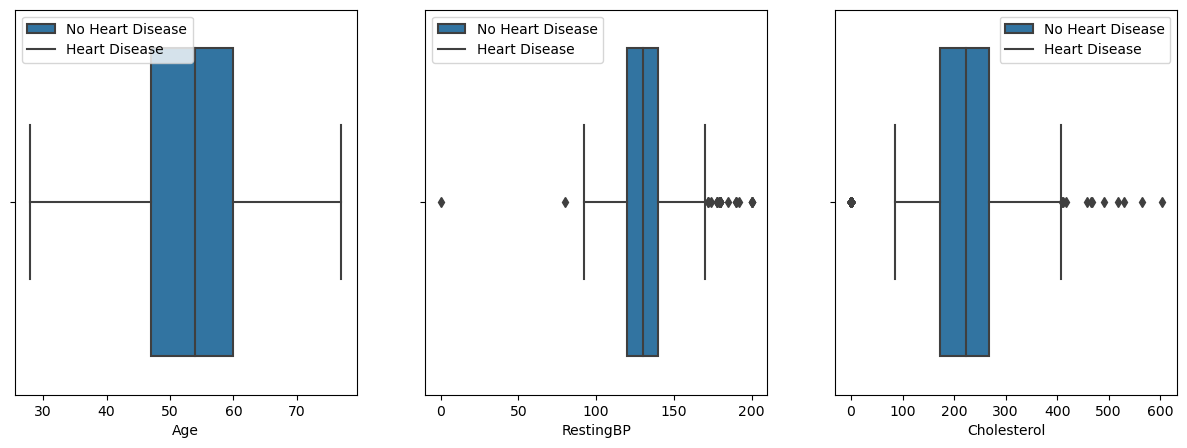

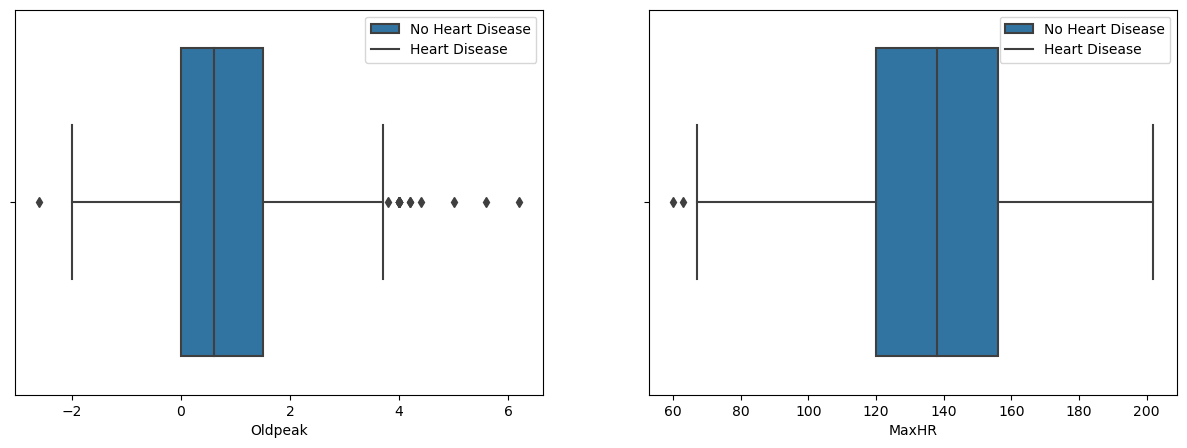

In [27]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=data, x=numerical_features[i], hue="HeartDisease")
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-2,-1]:
    plt.subplot(1,2,-i)
    sns.boxplot(data=data, x=numerical_features[i], hue="HeartDisease")
    plt.legend(['No Heart Disease', 'Heart Disease'])

In [28]:
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['RestingBP'] >= lower_bound) & (data['RestingBP'] <= upper_bound)]

In [29]:
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Cholesterol'] >= lower_bound) & (data['Cholesterol'] <= upper_bound)]

In [30]:
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Oldpeak'] >= lower_bound) & (data['Oldpeak'] <= upper_bound)]

In [31]:
Q1 = data['MaxHR'].quantile(0.25)
Q3 = data['MaxHR'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['MaxHR'] >= lower_bound) & (data['MaxHR'] <= upper_bound)]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             701 non-null    int64  
 1   Sex             701 non-null    object 
 2   ChestPainType   701 non-null    object 
 3   RestingBP       701 non-null    int64  
 4   Cholesterol     701 non-null    int64  
 5   FastingBS       701 non-null    int64  
 6   RestingECG      701 non-null    object 
 7   MaxHR           701 non-null    int64  
 8   ExerciseAngina  701 non-null    object 
 9   Oldpeak         701 non-null    float64
 10  ST_Slope        701 non-null    object 
 11  HeartDisease    701 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 71.2+ KB


# <div style="text-align:center">Summer of EDA</div>

Fitur Kategori (Urutan): 
- Jenis Kelamin: Pria > Wanita
- Tipe Nyeri Dada: ASY (Tidak Terdeteksi) > NAP (Nyeri Non Angina) > ATA (Angina Atipik) > TA (Angina Tipik)
- Gula Darah Puasa: (Kadar Gula Darah Puasa < 120 mg/dl) > (Kadar Gula Darah Puasa > 120 mg/dl)
- Elektrokardiogram Istirahat (RestingECG): Normal > ST (Perubahan Gelombang ST-T) > LVH (Hipertrofi Ventrikel Kiri)
- Angina Latihan: Angina > Tanpa Angina
- Kemiringan ST (ST_Slope): Datar (Flat) > Naik (Up) > Turun (Down)

Fitur Numerik (Rentang):

- Usia: 50 tahun ke atas
- Tekanan Darah Istirahat: 95 - 170
- Kolesterol: 160 - 340
- Denyut Jantung Maksimal (MaxHR): 70 - 180
- Depresi ST (Oldpeak): 0 - 4

Sekarang, setelah kita memahami nilai-nilai khas dari fitur-fitur tersebut, langkah selanjutnya adalah memilih fitur-fitur yang sesuai untuk pemodelan.

# <div style="text-align:center">Feature Engineering</div> 

In [33]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


Model machine learning tidak memahami satuan dari nilai-nilai fitur. Model tersebut memperlakukan masukan hanya sebagai angka sederhana tanpa memahami makna sebenarnya dari nilai tersebut. Oleh karena itu, perlu untuk melakukan penskalaan data.

Contoh: Usia = Tahun; FastingBS = mg/dl

Ada 2 pilihan untuk penskalaan data: 
1) Normalisasi 
2) Standardisasi

Kebanyakan algoritma mengasumsikan data mengikuti distribusi normal (Gaussian), maka Normalisasi dilakukan untuk fitur-fitur yang datanya tidak menunjukkan distribusi normal, sementara Standardisasi dilakukan untuk fitur-fitur yang terdistribusi normal tetapi nilainya sangat besar atau sangat kecil dibandingkan dengan fitur-fitur lainnya.

Normalisasi: Fitur Oldpeak dinormalisasi karena fitur ini menampilkan distribusi data yang miring ke kanan.

Standardisasi: Fitur-fitur Usia, Tekanan Darah Istirahat, Kolesterol, dan Denyut Jantung Maksimal diubah skala karena fitur-fitur ini terdistribusi normal dan nilainya besar atau sangat kecil dibandingkan dengan fitur-fitur lainnya.

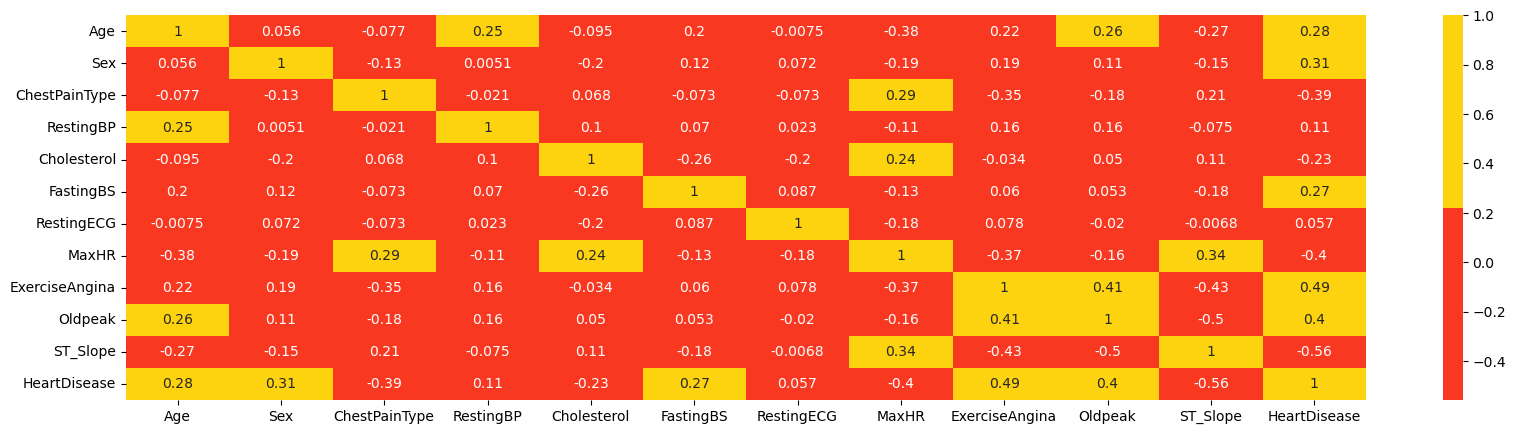

In [35]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

ni merujuk pada kasus ketika Anda memiliki matriks korelasi yang besar dengan banyak fitur, dan Anda hanya ingin memeriksa korelasi fitur-fitur tersebut dengan variabel "HeartDisease" (Penyakit Jantung). Dalam hal ini, Anda ingin mengevaluasi bagaimana setiap fitur berkorelasi dengan variabel target "HeartDisease" tanpa harus melihat korelasi antara fitur-fitur lainnya.

Pendekatan ini berguna untuk menyederhanakan analisis dan fokus pada korelasi fitur-fitur individu terhadap variabel target, yang mungkin menjadi faktor penting dalam memahami pengaruh masing-masing fitur terhadap penyakit jantung. Dengan demikian, Anda mengabaikan korelasi antara fitur-fitur yang satu dengan yang lain dalam konteks analisis ini.

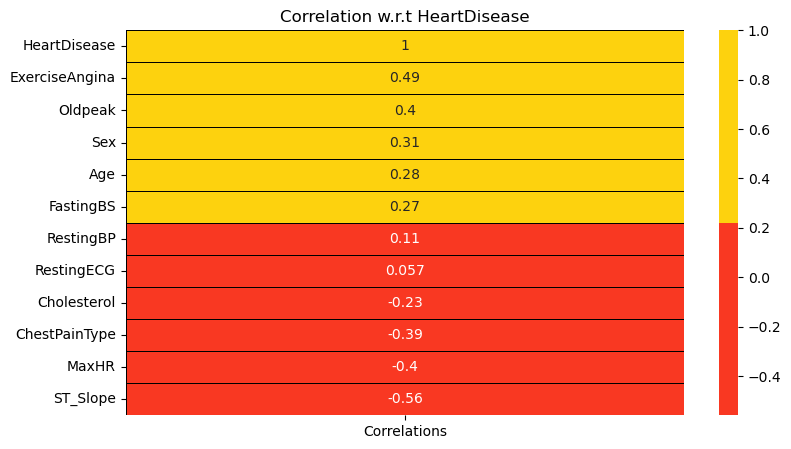

In [36]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize=(9,5))

sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4,linecolor = 'black')
plt.title('Correlation w.r.t HeartDisease');
plt.show()

- Artinya, hampir semua fitur (kecuali "RestingBP" dan "RestingECG") memiliki hubungan korelasi dengan "HeartDisease," yang bisa positif (berkorelasi ketika satu naik, yang lain juga naik) atau negatif (berkorelasi ketika satu naik, yang lain turun).

Feature Selection for Categorical Features :

Chi Squared Test :

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

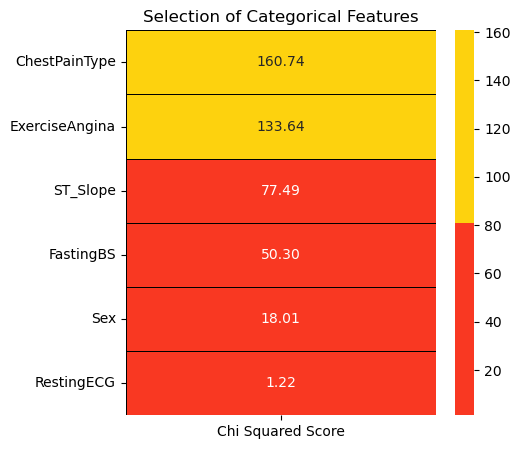

In [38]:
features = df1.loc[:, categorical_features[0:-1]]
target = df1.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Kecuali "RestingECG," semua fitur kategoris yang tersisa sangat penting untuk memprediksi penyakit jantung.

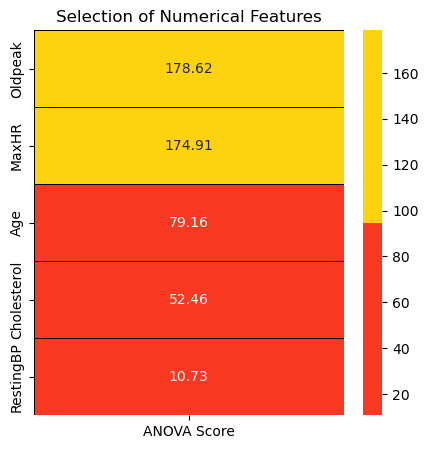

In [39]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

We will leave out RestingBP from the modeling part and take the remaining features.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [41]:
features = df1.drop(columns=['HeartDisease','RestingBP','RestingECG']).values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=3) 

In [42]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

1] logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

Accuracy :  88.04%
Cross Validation Score :  90.26%
ROC_AUC Score :  87.99%


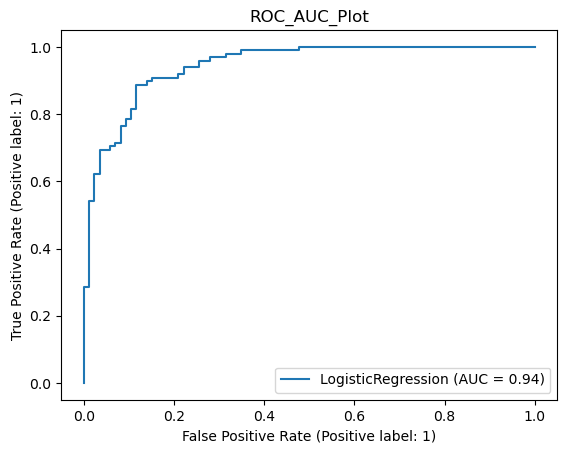

In [44]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        86
           1       0.89      0.89      0.89        98

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



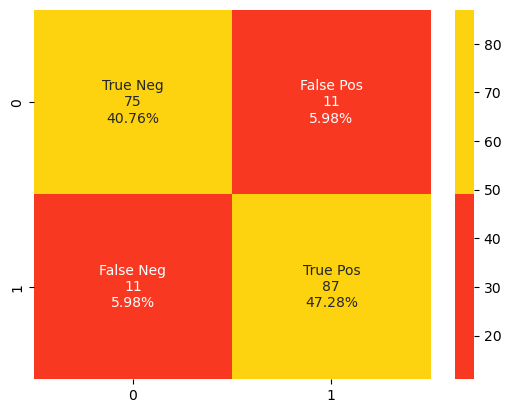

In [45]:
model_evaluation(classifier_lr)

2] Support Vector Classifier :

Accuracy :  87.50%
Cross Validation Score :  89.97%
ROC_AUC Score :  87.48%


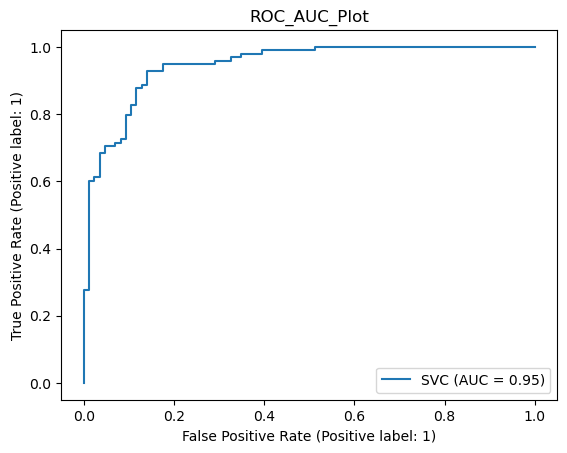

In [46]:
from sklearn.svm import SVC

classifier_svc = SVC(kernel = 'linear',C = 0.1)

model(classifier_svc)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        86
           1       0.89      0.88      0.88        98

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



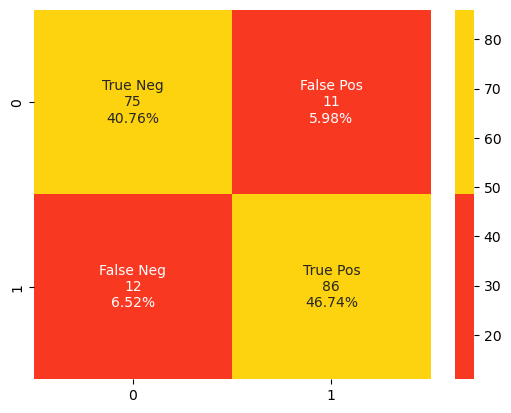

In [47]:
model_evaluation(classifier_svc)

3] Decision Tree Classifier :

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  88.59%
Cross Validation Score :  88.41%
ROC_AUC Score :  88.36%


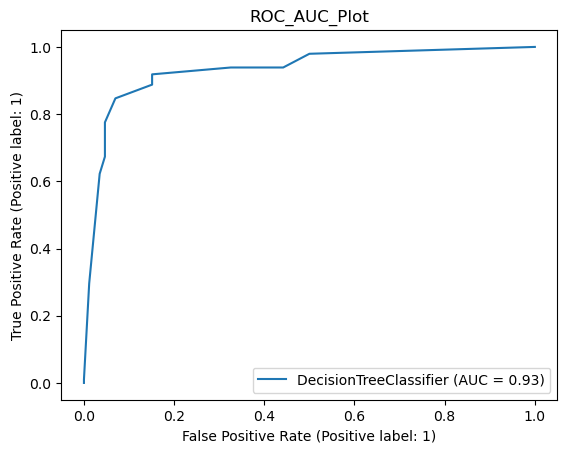

In [50]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        86
           1       0.87      0.92      0.90        98

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



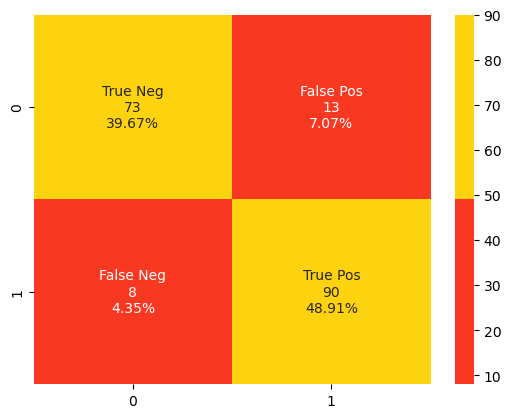

In [51]:
model_evaluation(classifier_dt)

4] Random Forest Classifier :

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 10)

Accuracy :  91.85%
Cross Validation Score :  91.41%
ROC_AUC Score :  91.64%


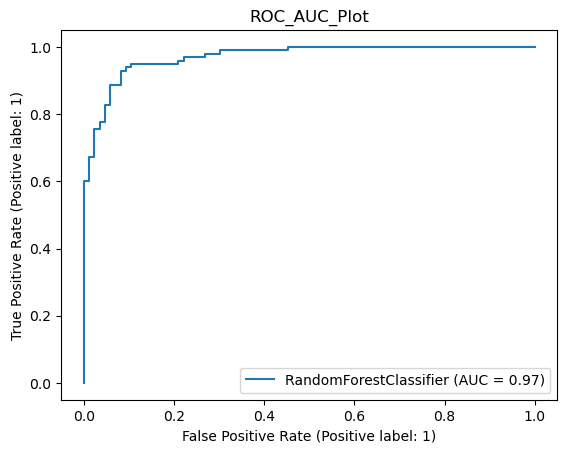

In [54]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        86
           1       0.90      0.95      0.93        98

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



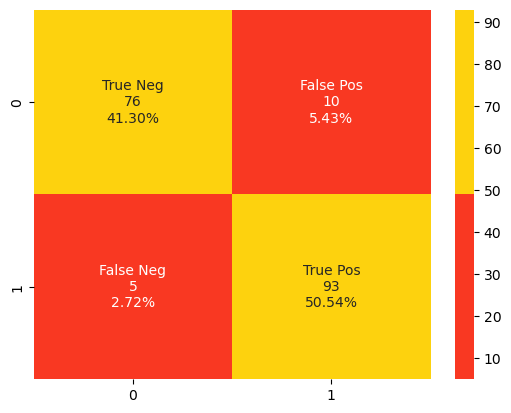

In [55]:
model_evaluation(classifier_rf)

5] K-Nearest Neighbors Classfier :

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  89.13%
Cross Validation Score :  86.86%
ROC_AUC Score :  89.23%


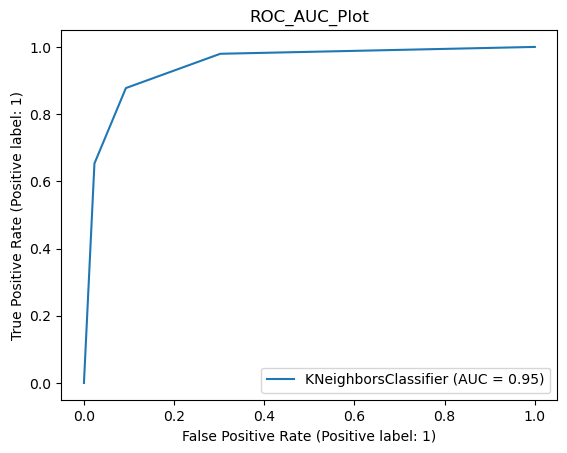

In [58]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        86
           1       0.91      0.88      0.90        98

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



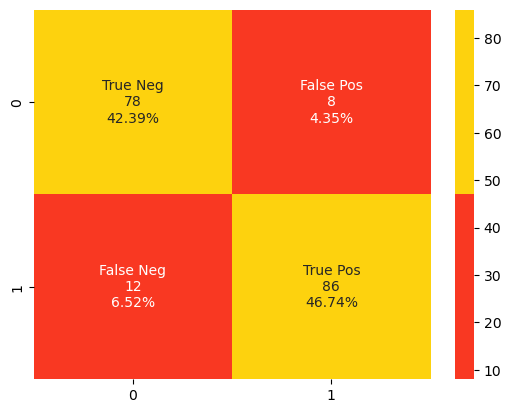

In [59]:
model_evaluation(classifier_knn)

| No | ML Algoritm | Accuracy | Cross Validation Score | ROC AUC Score |
|---------|---------|---------| ---------|---------|
| 1  | Logistic Regression | 88.04% | 90.26% | 87.99% |
| 2  | Support Vector Classifier | 87.50% | 89.97% | 87.48% |
| 3  | Decision Tree Classifier | 88.59% | 88.41% | 88.36% |
| 4  | Random Forest Classifier | 91.85% | 91.41% | 91.64% |
| 5  | K-Nearest Neighbors Classfier | 89.13% | 86.86% | 89.23% |